In [69]:
#######################
# standard code block #
#######################

%pylab inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


# Introduction to Pandas

## From the Pandas Documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###

Pandas has an official 10 minute intro.

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set Up Pandas Default Parameters

In [70]:
# imports a library 'pandas', names it as 'pd'
# this is a common convention
import pandas as pd
import numpy as np

In [71]:
# if you run into trouble, it's often helpful to know which version you're on
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 0.24.1
Numpy version: 1.16.2


In [72]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data Structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. DataFrames

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

## So, What is a Pandas DataFrame?

In [73]:
pd.Series?

In [74]:
## Make a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
pd.DataFrame?

In [11]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df1

,A,B,C,D
0,-0.327,0.414,-0.177,-0.686
1,-0.335,1.138,2.157,-0.169
2,-0.178,-0.485,-0.698,1.325
3,-0.572,0.031,-0.831,-0.032
4,1.964,0.378,-0.542,0.287
5,-0.317,-0.876,-1.020,-1.691


In [12]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Load a Data Set

### "Census Income" Dataset

http://archive.ics.uci.edu/ml/  
pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [4]:
# download the data and name the columns
cols = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
    'income'
]

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=cols)

### Q: What's happening in the above cell?

First you gave names to the various column labels, then you created a DataFrame based on the data in the CSV file.

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [15]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### head

Displays the first few rows in the dataframe

In [ ]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

### tail

Displays the last few rows in the dataframe

In [ ]:
df.tail()

### sample

Displays a sample of rows in the dataframe

In [10]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Q: What do you expect to happen when you re-run the cell?

What actually happens? Why?

I might have expected to see a different sample, but it picked the same rows from the dataset.
I'm guessing this has to do with the random_state argument that we passed.

### Columns

Returns a list of columns in the dataframe

In [75]:
# view all columns of the dataframe
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [76]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
ethnicity         object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

## Rename Columns

In [77]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [78]:
# replace a column name
df.rename(columns={'country_of_origin': 'native_country'}, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Q: What does `in_place` do above?

Passing the ```inplace``` argument above ensures that the function not only returns a dataframe with those columns renamed, but that it also makes that change to the dataframe referred to by df.

## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### describe

Displays summary statistic for each numerical column

In [79]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts

Counts the number of occurrences of each categorical value for the column

In [13]:
df['education']

0            Bachelors
1            Bachelors
2              HS-grad
3                 11th
4            Bachelors
5              Masters
6                  9th
7              HS-grad
8              Masters
9            Bachelors
10        Some-college
11           Bachelors
12           Bachelors
13          Assoc-acdm
14           Assoc-voc
15             7th-8th
16             HS-grad
17             HS-grad
18                11th
19             Masters
20           Doctorate
21             HS-grad
22                 9th
23                11th
24             HS-grad
25           Bachelors
26             HS-grad
27        Some-college
28             HS-grad
29             HS-grad
             ...      
32531        Bachelors
32532        Doctorate
32533        Bachelors
32534     Some-college
32535             12th
32536        Bachelors
32537          HS-grad
32538        Bachelors
32539        Doctorate
32540          HS-grad
32541          HS-grad
32542          HS-grad
32543      

In [14]:
type(df.education)

pandas.core.series.Series

In [15]:
df.education.value_counts()

## Also works for numeric columns - treating the individual values as factors

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
type(df.education.value_counts())

pandas.core.series.Series

In [18]:
%matplotlib inline

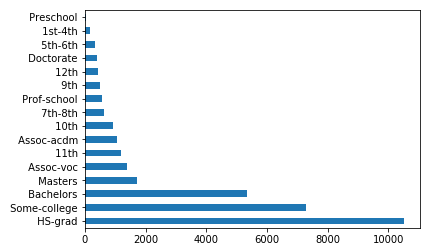

In [19]:
df.education.value_counts().plot('barh')

In [20]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

40.437455852092995

### Q: What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


I think we will get a Pandas Series.

### Unique

Returns the unique values for the column

In [21]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df["education"] = df.education.str.strip()

In [24]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [25]:
df.gender.unique()

array([' Male', ' Female'], dtype=object)

In [26]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [27]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## Selecting Rows and Columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [28]:
# select a row
df.iloc[3]

age                                53
workclass                     Private
fnlwgt                         234721
education                        11th
education_num                       7
marital_status     Married-civ-spouse
occupation          Handlers-cleaners
relationship                  Husband
ethnicity                       Black
gender                           Male
capital_gain                        0
capital_loss                        0
hours_per_week                     40
native_country          United-States
income                          <=50K
Name: 3, dtype: object

In [29]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [30]:
# select a range of rows
df.iloc[10:15]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [31]:
# last 2 rows
df.iloc[-2:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [32]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [33]:
# select a row
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### Q: Why did I get 4 rows above here instead of 3?





Integers vs. labels!

This means that when you slice by label using loc as so ```df.loc[x:y:z]``` the stop term ```y``` is inclusive rather than exclusive, as it is with integer indices. It makes sense, because especially if the rows correspond to strings, you don't necessarily know the label of the row that comes next, as you do with position-based indices.

In [36]:
(df.loc[0:2, 'age'])

0    39
1    50
2    38
Name: age, dtype: int64

In [37]:
df.iloc[0:2, 2:6]

,fnlwgt,education,education_num,marital_status
0,77516,Bachelors,13,Never-married
1,83311,Bachelors,13,Married-civ-spouse


## Filtering

In [38]:
(df.age > 50)

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22       False
23       False
24        True
25        True
26       False
27        True
28       False
29       False
         ...  
32531    False
32532    False
32533     True
32534    False
32535    False
32536    False
32537    False
32538    False
32539     True
32540    False
32541    False
32542     True
32543    False
32544    False
32545    False
32546    False
32547    False
32548     True
32549    False
32550    False
32551    False
32552    False
32553    False
32554     True
32555    False
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, Length: 32561, dtype: bool

In [40]:
asd = df[df.age > 50].head(5)

In [43]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?

df.iloc[df.age > 50, [0,3,6,9,16]]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

What happens, it turns out, is that we get a NotImplementedError, meaning that that specific filter functionality just doesn't exist using iloc.

In [44]:
df[df.age > 50].head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K


## Now Filter on Gender

In [45]:
df.gender == 'Male'

0         True
1         True
2         True
3         True
4        False
5        False
6        False
7         True
8        False
9         True
10        True
11        True
12       False
13        True
14        True
15        True
16        True
17        True
18        True
19       False
20        True
21       False
22        True
23        True
24       False
25        True
26        True
27        True
28        True
29        True
         ...  
32531    False
32532     True
32533     True
32534    False
32535     True
32536    False
32537     True
32538    False
32539     True
32540    False
32541    False
32542     True
32543    False
32544    False
32545    False
32546    False
32547     True
32548     True
32549    False
32550     True
32551     True
32552     True
32553     True
32554     True
32555     True
32556    False
32557     True
32558    False
32559     True
32560    False
Name: gender, Length: 32561, dtype: bool

In [46]:
df.loc[df.gender == 'Male', ]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


## Now Filter on Gender and Age Between 30 and 40

In [47]:
(df.gender == 'Male') & (df.age >= 30) & (df.age <= 40)

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11        True
12       False
13        True
14        True
15        True
16       False
17        True
18        True
19       False
20        True
21       False
22        True
23       False
24       False
25       False
26       False
27       False
28        True
29       False
         ...  
32531    False
32532     True
32533    False
32534    False
32535    False
32536    False
32537     True
32538    False
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551     True
32552    False
32553     True
32554    False
32555    False
32556    False
32557     True
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [48]:
(df.age >= 30) & (df.gender == 'Male')

df.loc[(df.age >= 30) & (df.gender == 'Male') & (df.age <= 40), :]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


## Find Nulls

In [49]:
# as we saw with df.info() there are no nulls...
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income


## Fill Nulls

In [50]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])

In [51]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [52]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

0       1.0
1       2.0
2       4.0
3    1000.0
Name: column1, dtype: float64

In [53]:
# fillna does not do it inplace unless you specify
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [54]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [55]:
null_df.fillna('random_string')

,column1
0,1.0
1,2.0
2,4.0
3,2.0


## Drop Nulls

In [56]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [57]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [58]:
# .isnull() and .notnull() do opposite things
null_df.isnull()

,column1
0,False
1,False
2,False
3,True


In [59]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Groupby

In [95]:
new_df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                       ('bird', 'Psittaciformes', 24.0),
                       ('mammal', 'Carnivora', 80.2),
                       ('mammal', 'Primates', np.nan),
                       ('mammal', 'Carnivora', 58)],
                      index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                      columns=('class', 'order', 'max_speed'))

In [96]:
new_df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [146]:
grouped = new_df.groupby('order')

In [148]:
grouped.groups

{'Carnivora': Index(['lion', 'leopard'], dtype='object'),
 'Falconiformes': Index(['falcon'], dtype='object'),
 'Primates': Index(['monkey'], dtype='object'),
 'Psittaciformes': Index(['parrot'], dtype='object')}

In [140]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education_num','education']).mean()

,,age,fnlwgt,capital_gain,capital_loss,hours_per_week
education_num,education,,,,,
1,Preschool,42.765,235889.373,898.392,66.490,36.647
2,1st-4th,46.143,239303.000,125.875,48.327,38.256
3,5th-6th,42.886,232448.333,176.021,68.252,38.898
4,7th-8th,48.446,188079.172,233.940,65.669,39.367
5,9th,41.060,202485.066,342.089,28.998,38.045
6,10th,37.430,196832.465,404.574,56.846,37.053
7,11th,32.356,194928.077,215.098,50.079,33.926
8,12th,32.000,199097.508,284.088,32.337,35.781
9,HS-grad,38.974,189538.740,576.800,70.467,40.575


In [62]:
df.groupby([
    'education',
    'age',
])[['hours_per_week', 'capital_gain']].mean()

hours_per_week  capital_gain
education    age                              
10th         17        21.543478    266.659420
             18        27.894737      0.000000
             19        34.500000      0.000000
             20        39.400000      0.000000
             21        39.000000    229.882353
             22        37.052632      0.000000
             23        42.588235      0.000000
             24        41.888889      0.000000
             25        38.714286    123.666667
             26        42.705882    171.000000
             27        46.058824      0.000000
             28        39.914286      0.000000
             29        39.473684    263.842105
             30        40.230769      0.000000
             31        39.894737    110.789474
             32        41.681818      0.000000
             33        38.086957    148.608696
             34        41.285714      0.000000
             35        49.500000      0.000000
             36        42.684211    182.315789
             37        42.562500    164.687500
             38        43.846154    247.461538
             39        38.352941    155.000000
             40        40.944444      0.000000
             41        43.500000      0.000000
             42        40.250000   8333.250000
             43        40.538462      0.000000
             44        43.500000    365.500000
             45        48.111111    314.333333
             46        39.200000      0.000000
...                          ...           ...
Some-college 56        43.432836    710.746269
             57        42.294118   1957.573529
             58        40.694915   2203.542373
             59        42.370968   1038.387097
             60        40.018182    928.509091
             61        37.152174   3365.413043
             62        39.738095    446.214286
             63        34.941176   1658.382353
             64        30.437500    436.781250
             65        34.235294    725.764706
             66        34.880000    538.080000
             67        30.142857   2286.666667
             68        32.916667   1375.083333
             69        28.538462   2564.230769
             70        29.666667    629.476190
             71        30.100000   5644.400000
             72        28.666667   1071.416667
             73        26.857143   3332.000000
             74        19.727273   1822.818182
             75        23.750000      0.000000
             76        23.714286      0.000000
             77        22.142857      0.000000
             78         3.000000      0.000000
             79        20.000000      0.000000
             80        40.000000      0.000000
             81        13.000000      0.000000
             82        11.500000      0.000000
             84        35.000000      0.000000
             88        40.000000      0.000000
             90        32.833333      0.000000

[965 rows x 2 columns]

In [63]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

count       mean
income native_country                               
 <=50K  ?                             437  36.853547
        Cambodia                       12  35.666667
        Canada                         82  41.012195
        China                          55  41.800000
        Columbia                       57  39.228070
        Cuba                           70  47.285714
        Dominican-Republic             68  37.941176
        Ecuador                        24  34.833333
        El-Salvador                    97  32.649485
        England                        60  38.966667
        France                         17  38.117647
        Germany                        93  36.817204
        Greece                         21  44.666667
        Guatemala                      61  32.262295
        Haiti                          40  37.300000
        Holand-Netherlands              1  32.000000
        Honduras                       12  32.750000
        Hong                           14  34.571429
        Hungary                        10  47.000000
        India                          60  35.733333
        Iran                           25  38.120000
        Ireland                        19  34.578947
        Italy                          48  44.375000
        Jamaica                        71  34.676056
        Japan                          38  35.315789
        Laos                           16  33.937500
        Mexico                        610  32.901639
        Nicaragua                      32  33.593750
        Outlying-US(Guam-USVI-etc)     14  38.714286
        Peru                           29  35.379310
...                                   ...        ...
 >50K   France                         12  40.166667
        Germany                        44  44.409091
        Greece                          8  50.250000
        Guatemala                       3  35.666667
        Haiti                           4  48.000000
        Honduras                        1  47.000000
        Hong                            6  31.500000
        Hungary                         3  57.333333
        India                          40  41.625000
        Iran                           18  41.222222
        Ireland                         5  43.600000
        Italy                          25  50.360000
        Jamaica                        10  42.100000
        Japan                          24  42.875000
        Laos                            2  41.000000
        Mexico                         33  40.484848
        Nicaragua                       2  34.000000
        Peru                            2  33.500000
        Philippines                    61  42.737705
        Poland                         12  50.583333
        Portugal                        4  40.000000
        Puerto-Rico                    12  46.500000
        Scotland                        3  52.666667
        South                          16  44.875000
        Taiwan                         20  40.800000
        Thailand                        3  32.666667
        Trinadad&Tobago                 2  42.500000
        United-States                7171  44.297169
        Vietnam                         5  35.400000
        Yugoslavia                      6  40.166667

[82 rows x 2 columns]

In [64]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [65]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income', 'native_country'])
gb_aggs = gb.agg({'age': 'mean', 'capital_gain': 'sum'})
gb_aggs.sample(1)

,,age,capital_gain
income,native_country,,
<=50K,England,38.966667,12494


In [66]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(
    ['education']).hours_per_week.mean()

education
10th            36.915094
11th            33.682287
12th            34.950685
1st-4th         32.913043
5th-6th         36.979381
7th-8th         39.060120
9th             38.035443
Assoc-acdm      40.656823
Assoc-voc       41.633049
Bachelors       42.709190
Doctorate       47.408537
HS-grad         40.596063
Masters         44.168959
Preschool       28.117647
Prof-school     47.484064
Some-college    38.861869
Name: hours_per_week, dtype: float64

## Sort
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [67]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income', 'native_country']).mean().sort_values(
    'age', ascending=True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age         fnlwgt  education_num  \
income native_country                                                 
 <=50K  Taiwan              29.322581  181981.290323      12.548387   
 >50K   Dominican-Republic  30.500000  220226.000000       9.000000   
        Hong                31.500000  294478.833333      13.833333   
 <=50K  Holand-Netherlands  32.000000   27882.000000      10.000000   
        Guatemala           32.262295  266016.016393       5.950820   
        El-Salvador         32.649485  264114.123711       6.340206   
 >50K   Thailand            32.666667  199784.000000      12.666667   
 <=50K  Honduras            32.750000  272571.000000       8.166667   
        Mexico              32.901639  289038.116393       5.959016   
 >50K   Peru                33.500000  314562.500000      11.500000   
 <=50K  Nicaragua           33.593750  287987.906250       8.656250   
        Laos                33.937500  209838.187500       8.500000   
        Vietnam             33.951613  165028.725806       9.661290   
 >50K   Nicaragua           34.000000  399953.500000       9.500000   
 <=50K  Hong                34.571429  191441.571429       9.214286   
        Ireland             34.578947  138620.157895       9.736842   
        Jamaica             34.676056  212218.239437       9.704225   
        Ecuador             34.833333  188597.166667       9.291667   
        Japan               35.315789  197242.526316      10.710526   
        Peru                35.379310  271800.517241       9.206897   
        Thailand            35.400000  181043.200000      10.600000   
 >50K   Vietnam             35.400000  141648.400000       9.600000   
        Guatemala           35.666667  247825.666667       7.666667   
 <=50K  Cambodia            35.666667  167065.666667       7.916667   
        India               35.733333  171203.466667      11.483333   
        Scotland            36.333333  155825.888889      10.111111   
        United-States       36.816719  186950.051730       9.710032   
        Germany             36.817204  184968.236559      10.462366   
        ?                   36.853547  195354.379863      10.038902   
        South               37.218750  164191.921875      10.718750   
...                               ...            ...            ...   
 >50K   Cuba                41.520000  252969.680000      11.160000   
        India               41.625000  164542.525000      13.850000   
 <=50K  China               41.800000  175689.181818      10.309091   
 >50K   Jamaica             42.100000  211707.900000      10.900000   
        Trinadad&Tobago     42.500000  162096.000000       7.000000   
        Philippines         42.737705  178169.196721      12.442623   
        Japan               42.875000  167433.708333      12.583333   
        Ireland             43.600000  135631.800000      11.400000   
        United-States       44.297169  187433.992330      11.578859   
        ?                   44.328767  187154.513699      12.273973   
 <=50K  Italy               44.375000  179759.375000       7.750000   
 >50K   Germany             44.409091  198534.590909      12.090909   
        China               44.550000  188284.700000      13.350000   
 <=50K  Greece              44.666667  151661.285714       9.190476   
 >50K   South               44.875000  160641.250000      11.687500   
        England             45.533333  176206.700000      12.166667   
        Canada              45.769231  202084.076923      11.512821   
        Puerto-Rico         46.500000  221403.333333       9.833333   
        Honduras            47.000000   51835.000000      15.000000   
 <=50K  Hungary             47.000000  182993.800000      10.700000   
        Cuba                47.285714  243906.228571       9.042857   
 >50K   Ecuador             47.500000  169428.750000      10.500000   
        Haiti               48.000000  206832.500000       9.500000   
        El-Salvador         50.111111  149620.555556      

In [ ]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly